## Week 3: Projection method

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math

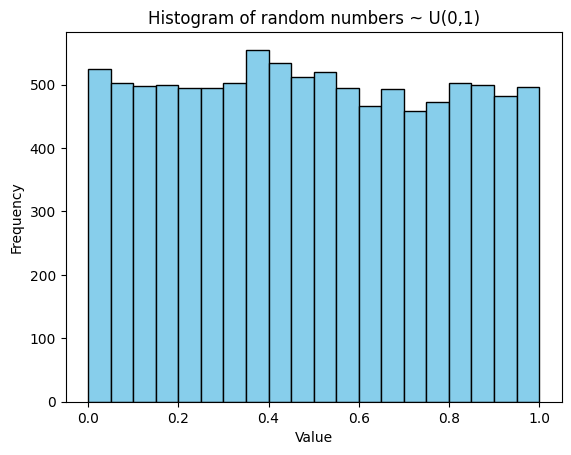

In [21]:
def generate_uniform_samples(N, m=2**32, a = 1103515245, c = 123, X = 2):
    U = []
    for i in range(N):
        X = (a*X+c)%m
        output = X/m
        U.append(output)
    return U

#main
m = 2**32  # Số nguyên lớn
a = 1103515245 # Thừa số nguyên
c = 123    # Hằng số nguyên
X = 5   # Số nguyên khởi tạo
N = 10000   # Số lượng số ngẫu nhiên cần tạo

uniform_samples = generate_uniform_samples(N)
plt.hist(uniform_samples, bins=20, color = 'skyblue', edgecolor='black')
plt.title("Histogram of random numbers ~ U(0,1)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### Generate random numbers of Normal distribution from Uniform distribution samples

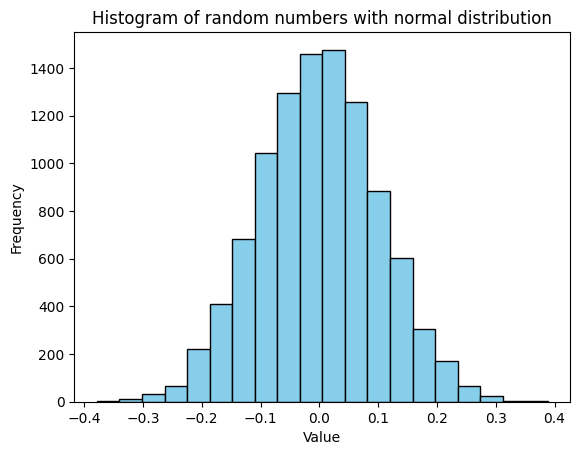

In [22]:
def box_muller_transform(u1, u2):
    z0 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    z1 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)
    return z0, z1

def generate_normal_samples(N, min_val=-1, max_val=1, mu=0, sigma=0.1):
    uniform_samples = generate_uniform_samples(N=N*2)
    normal_samples = []
    for i in range(0, len(uniform_samples), 2):
        if uniform_samples[i] == 0 or uniform_samples[i+1] == 0:
            continue
        else:
            u1, u2 = uniform_samples[i], uniform_samples[i+1] if i+1 < len(uniform_samples) else 0
            z0, z1 = box_muller_transform(u1, u2)
            normal_samples.append(z0 * sigma + mu)
    return [min(max_val, max(min_val, sample)) for sample in normal_samples]

# Determine parameters
min_val = -1
max_val = 1
mu = 0
sigma = 0.01
n = 10000

normal_numbers = generate_normal_samples(N=n)
plt.hist(normal_numbers, bins=20, color = 'skyblue', edgecolor='black')
plt.title("Histogram of random numbers with normal distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### Create function f = x^2 and f with Epsilon

In [23]:
#Initiate X
X = list(np.linspace(0, 1, n))

#Calculate f function
f = [i*i for i in X]

#Calculate f function with epsilon
f_e = [i + j for i, j in zip(f, normal_numbers)]

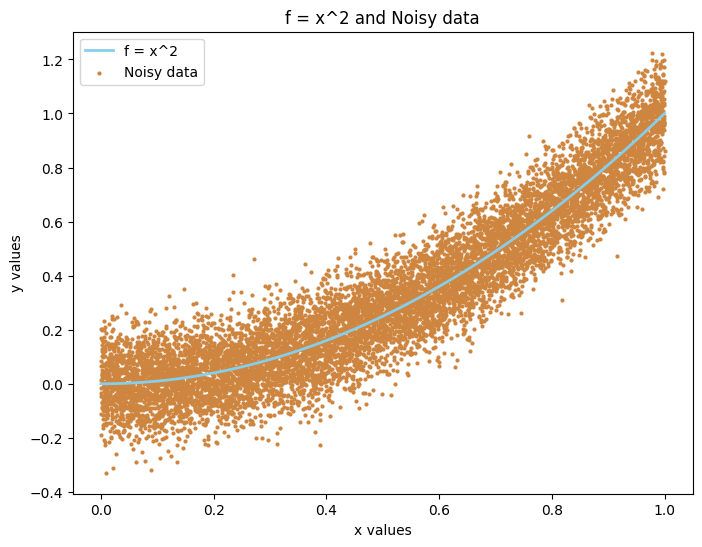

In [24]:
#Plot f and Noisy data
plt.figure(figsize=(8, 6))
plt.plot(X, f, '-', color='skyblue', linewidth=2, label='f(x) = x^2')
plt.scatter(X, f_e, color='peru', marker='.', lw = 0, label = 'Noisy data')
plt.title('f = x^2 and Noisy data')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()

### Calculate the approximate f

In [25]:
n = len(X)
N = 20

# Calculate phi
def phi(k, x):
    if k == 1:
        return 1
    if k%2 == 0:
        return np.sqrt(2) * np.cos(np.pi * k * x)
    else:
        return np.sqrt(2) * np.sin(np.pi * (k-1) * x)
    
#Calculate theta
theta = [0 for i in range(N+1)]
for k in range(1,N+1):
    for x,y in zip(X, f_e):
        theta[k] += y * phi(k,x)
    theta[k] = theta[k]/n

#Approximate f
f_approx = []
for x in X:
    t = 0
    for k in range(1, N+1):
        t += theta[k] * phi(k,x)
    f_approx.append(t)

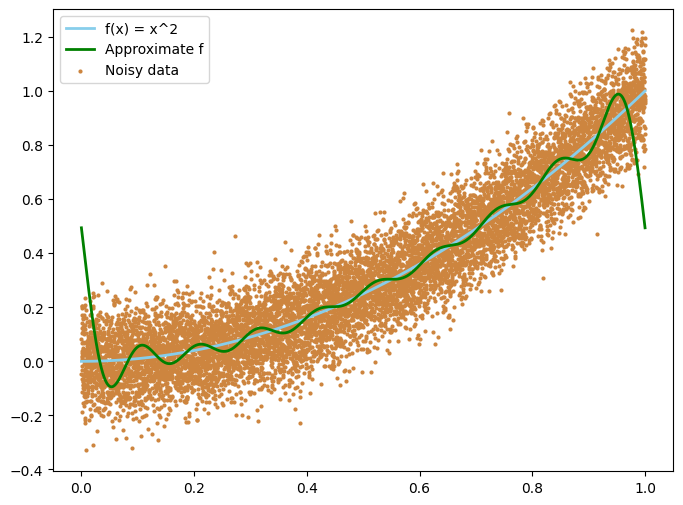

In [29]:
#Plot f, approximate f and noisy data
plt.figure(figsize=(8, 6))
plt.plot(X, f, '-', color='skyblue', linewidth=2, label='f(x) = x^2')
plt.plot(X, f_approx, linestyle='-', color='green', linewidth=2, label = 'Approximate f')
plt.scatter(X, f_e, color='peru', marker='.', lw = 0, label = 'Noisy data')
plt.legend()